In [1]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:
#libraries required to train the model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm
from tensorflow.keras import layers, models
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [4]:
dataset_dir="C:/Users/Uday/Desktop/python/Major/New-Data"

In [5]:
imgpath=[]
for (dirnames, foldernames, filenames) in os.walk(dataset_dir): #get the full path name of a type of file into all subdirectories with walk
    print(dirnames,foldernames,filenames)
    for filename in filenames:
        if (filename[-3:]=='jpg'): #using list slicing we can fetch the last 'n' elements from list
            imgpath.append(os.path.join(dirnames, filename)) #os.path.join  combines one or more path names into a single path and then paths will be appended to

C:/Users/Uday/Desktop/python/Major/New-Data ['test', 'train', 'valid'] []
C:/Users/Uday/Desktop/python/Major/New-Data\test ['COVID19', 'LUNG CANCER', 'NORMAL', 'PNEUMONIA', 'TUBERCULOSIS'] []
C:/Users/Uday/Desktop/python/Major/New-Data\test\COVID19 [] ['0100.jpg', '0102.jpg', '0105.jpg', '0106.jpg', '0108.jpg', '0111.jpg', '0112.jpg', '0113.jpg', '0115.jpg', '0118.jpg', '0119.jpg', '0120.jpg', '094.jpg', '096.jpg', '098.jpg', 'auntminnie-2020_01_31_20_24_2322_2020_01_31_x-ray_coronavirus_US.jpg', 'auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', 'auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpg', 'auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', 'auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpg', 'auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', 'auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpg', 'auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_co

In [6]:
#initialize the list of image data and target labels
data=[]
target=[]
resize=150

dic={'COVID19': 'COVID19', 'LUNG CANCER': 'LUNG CANCER', 'NORMAL': 'NORMAL', 'PNEUMONIA': 'PNEUMONIA', 'TUBERCULOSIS': 'TUBERCULOSIS'} #dictionary to map file label name with target label name

In [7]:
for imgpaths in tqdm(imgpath):  #tqdm is used to make terminal progress bar
    label=imgpaths.split(os.path.sep)[-2]
    image=cv2.imread(imgpaths)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image=cv2.resize(image, (resize, resize)) /255 #resizing the image
    

    #updates the respective data and target label lists
    data.append(image)
    target.append(dic[label])

100%|████████████████████████████████████████████████████████████████████████████| 13121/13121 [06:21<00:00, 34.44it/s]


In [8]:
print(len(data)) #to know length of data

13121


In [46]:
# #box plot and counting the lables
# df=pd.DataFrame(target,columns=['labels'])
# sns.countplot(df['labels'])
# plt.show()

In [10]:
size=[]
for file in imgpath: #for loop to get image paths
    img=plt.imread(file) #used to read an image from a file into an array
    size.append(img.shape) #image.shape returns a tuple of the number of rows, columns, and channels (if the image is color).
pd.Series(size).value_counts() #it retures a series containing counts of unique values

(232, 232, 3)      4228
(256, 256, 3)      1000
(512, 512, 3)       816
(2000, 2000, 3)      92
(1024, 1024, 3)      68
                   ... 
(1747, 2009, 3)       1
(1136, 1270, 3)       1
(2542, 2495, 3)       1
(1048, 1376, 3)       1
(1608, 1816, 3)       1
Length: 5423, dtype: int64

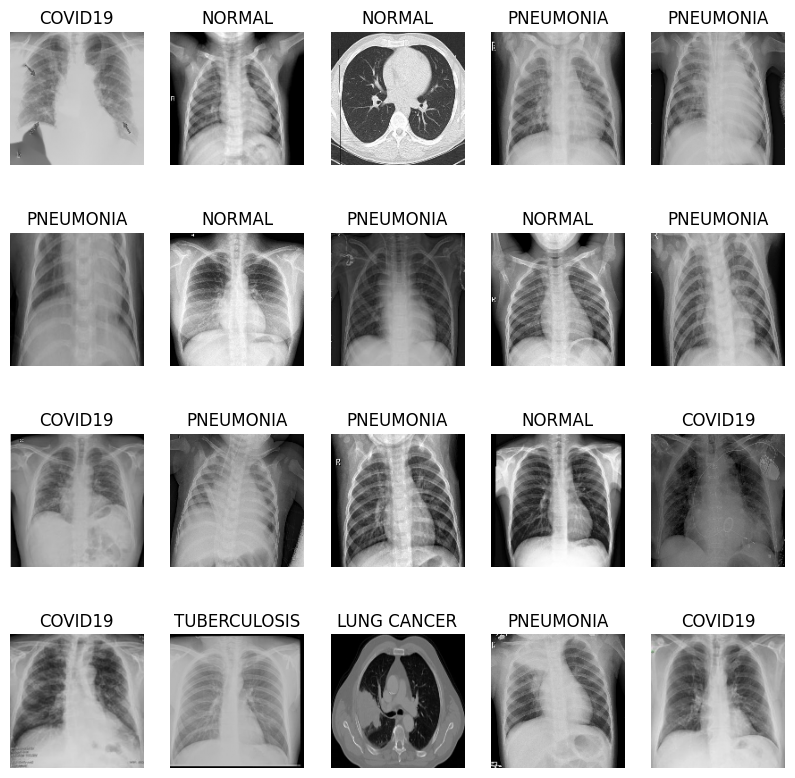

In [12]:
plt.figure(figsize=(10,10)) #to change the size of the images
for c , i in enumerate(list(np.random.randint(0,len(imgpath),20))) : #enumerate() to get a counter and the value from the iterable at the same time and random.randit() to generate randome images from image path
    plt.subplot(4,5,c+1)
    plt.imshow(data[i] , cmap='gray')
    plt.title(target[i])
    plt.axis('off')     
plt.show()
     

In [13]:
#encode labels as integer
le=LabelEncoder() #labelencoder used to normalize labels
labels=le.fit_transform(target) #also be used to transform non-numerical labels to numerical labels
labels=to_categorical(labels)

print(le.classes_)
print(labels[0])

['COVID19' 'LUNG CANCER' 'NORMAL' 'PNEUMONIA' 'TUBERCULOSIS']
[1. 0. 0. 0. 0.]


In [14]:
print(len(data))
print(len(labels))


13121
13121


In [15]:
for i in range(len(data)):
    if data[i] != labels[i]:
        print(f"Mismatch at index {i}")


C:\Users\Uday\AppData\Local\Temp\ipykernel_7544\466052485.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if data[i] != labels[i]:


Mismatch at index 0
Mismatch at index 1
Mismatch at index 2
Mismatch at index 3
Mismatch at index 4
Mismatch at index 5
Mismatch at index 6
Mismatch at index 7
Mismatch at index 8
Mismatch at index 9
Mismatch at index 10
Mismatch at index 11
Mismatch at index 12
Mismatch at index 13
Mismatch at index 14
Mismatch at index 15
Mismatch at index 16
Mismatch at index 17
Mismatch at index 18
Mismatch at index 19
Mismatch at index 20
Mismatch at index 21
Mismatch at index 22
Mismatch at index 23
Mismatch at index 24
Mismatch at index 25
Mismatch at index 26
Mismatch at index 27
Mismatch at index 28
Mismatch at index 29
Mismatch at index 30
Mismatch at index 31
Mismatch at index 32
Mismatch at index 33
Mismatch at index 34
Mismatch at index 35
Mismatch at index 36
Mismatch at index 37
Mismatch at index 38
Mismatch at index 39
Mismatch at index 40
Mismatch at index 41
Mismatch at index 42
Mismatch at index 43
Mismatch at index 44
Mismatch at index 45
Mismatch at index 46
Mismatch at index 47
Mi

Mismatch at index 6635
Mismatch at index 6636
Mismatch at index 6637
Mismatch at index 6638
Mismatch at index 6639
Mismatch at index 6640
Mismatch at index 6641
Mismatch at index 6642
Mismatch at index 6643
Mismatch at index 6644
Mismatch at index 6645
Mismatch at index 6646
Mismatch at index 6647
Mismatch at index 6648
Mismatch at index 6649
Mismatch at index 6650
Mismatch at index 6651
Mismatch at index 6652
Mismatch at index 6653
Mismatch at index 6654
Mismatch at index 6655
Mismatch at index 6656
Mismatch at index 6657
Mismatch at index 6658
Mismatch at index 6659
Mismatch at index 6660
Mismatch at index 6661
Mismatch at index 6662
Mismatch at index 6663
Mismatch at index 6664
Mismatch at index 6665
Mismatch at index 6666
Mismatch at index 6667
Mismatch at index 6668
Mismatch at index 6669
Mismatch at index 6670
Mismatch at index 6671
Mismatch at index 6672
Mismatch at index 6673
Mismatch at index 6674
Mismatch at index 6675
Mismatch at index 6676
Mismatch at index 6677
Mismatch at

Mismatch at index 12671
Mismatch at index 12672
Mismatch at index 12673
Mismatch at index 12674
Mismatch at index 12675
Mismatch at index 12676
Mismatch at index 12677
Mismatch at index 12678
Mismatch at index 12679
Mismatch at index 12680
Mismatch at index 12681
Mismatch at index 12682
Mismatch at index 12683
Mismatch at index 12684
Mismatch at index 12685
Mismatch at index 12686
Mismatch at index 12687
Mismatch at index 12688
Mismatch at index 12689
Mismatch at index 12690
Mismatch at index 12691
Mismatch at index 12692
Mismatch at index 12693
Mismatch at index 12694
Mismatch at index 12695
Mismatch at index 12696
Mismatch at index 12697
Mismatch at index 12698
Mismatch at index 12699
Mismatch at index 12700
Mismatch at index 12701
Mismatch at index 12702
Mismatch at index 12703
Mismatch at index 12704
Mismatch at index 12705
Mismatch at index 12706
Mismatch at index 12707
Mismatch at index 12708
Mismatch at index 12709
Mismatch at index 12710
Mismatch at index 12711
Mismatch at inde

In [16]:
#spliting data into training and testing (80-20 Ratio)

(trainX, testX, trainY, testY)=train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

trainX=np.array(trainX)
testX=np.array(testX)
trainY=np.array(trainY)
testY=np.array(testY)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(10496, 150, 150, 3)
(2625, 150, 150, 3)
(10496, 5)
(2625, 5)


In [17]:
from sklearn.utils import shuffle

# shuffle the data and labels together using the same random state
data, labels = shuffle(data, labels, random_state=42)

#spliting data into training and testing (80-20 Ratio)
(trainX, testX, trainY, testY)=train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

trainX=np.array(trainX)
testX=np.array(testX)
trainY=np.array(trainY)
testY=np.array(testY)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(10496, 150, 150, 3)
(2625, 150, 150, 3)
(10496, 5)
(2625, 5)


In [18]:
trainX[0]

array([[[0.5372549 , 0.5372549 , 0.5372549 ],
        [0.55294118, 0.55294118, 0.55294118],
        [0.57254902, 0.57254902, 0.57254902],
        ...,
        [0.55686275, 0.55686275, 0.55686275],
        [0.5372549 , 0.5372549 , 0.5372549 ],
        [0.52941176, 0.52941176, 0.52941176]],

       [[0.52156863, 0.52156863, 0.52156863],
        [0.5372549 , 0.5372549 , 0.5372549 ],
        [0.56862745, 0.56862745, 0.56862745],
        ...,
        [0.55686275, 0.55686275, 0.55686275],
        [0.5372549 , 0.5372549 , 0.5372549 ],
        [0.52941176, 0.52941176, 0.52941176]],

       [[0.54117647, 0.54117647, 0.54117647],
        [0.54509804, 0.54509804, 0.54509804],
        [0.55294118, 0.55294118, 0.55294118],
        ...,
        [0.56078431, 0.56078431, 0.56078431],
        [0.5372549 , 0.5372549 , 0.5372549 ],
        [0.53333333, 0.53333333, 0.53333333]],

       ...,

       [[0.17647059, 0.17647059, 0.17647059],
        [0.04705882, 0.04705882, 0.04705882],
        [0.16862745, 0

In [19]:
from tensorflow.keras import backend as K
K.clear_session()
     

In [20]:
#CNN Model
s=150
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(s,s,3), kernel_initializer='he_normal'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation="softmax"))

In [21]:
#compile
model.compile(optimizer=Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [22]:

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 33, 33, 128)      0

In [29]:

data=[]
imgpath=[]
df=[]
size=[]

In [23]:
                    
#will train model upto 20 epochs
epochs=20
batch_size=64
ThisModel=model.fit(trainX, trainY, batch_size, steps_per_epoch=len(trainX) // batch_size, validation_data=(testX, testY), validation_steps=len(testX) // batch_size, epochs=epochs, verbose=1)                    

Epoch 1/20
164/164 [==============================] - 307s 2s/step - loss: 0.7784 - accuracy: 0.8121 - val_loss: 0.2324 - val_accuracy: 0.9204
Epoch 2/20
164/164 [==============================] - 274s 2s/step - loss: 0.2414 - accuracy: 0.9211 - val_loss: 0.1830 - val_accuracy: 0.9425
Epoch 3/20
164/164 [==============================] - 230s 1s/step - loss: 0.1738 - accuracy: 0.9442 - val_loss: 0.1511 - val_accuracy: 0.9493
Epoch 4/20
164/164 [==============================] - 223s 1s/step - loss: 0.1392 - accuracy: 0.9536 - val_loss: 0.1171 - val_accuracy: 0.9657
Epoch 5/20
164/164 [==============================] - 230s 1s/step - loss: 0.1184 - accuracy: 0.9605 - val_loss: 0.1284 - val_accuracy: 0.9577
Epoch 6/20
164/164 [==============================] - 224s 1s/step - loss: 0.0943 - accuracy: 0.9693 - val_loss: 0.1244 - val_accuracy: 0.9646
Epoch 7/20
164/164 [==============================] - 237s 1s/step - loss: 0.0715 - accuracy: 0.9766 - val_loss: 0.1413 - val_accuracy: 0.9569

In [24]:
model.save('C:/Users/Uday/Desktop/python/Major/Final_CNN.h5')

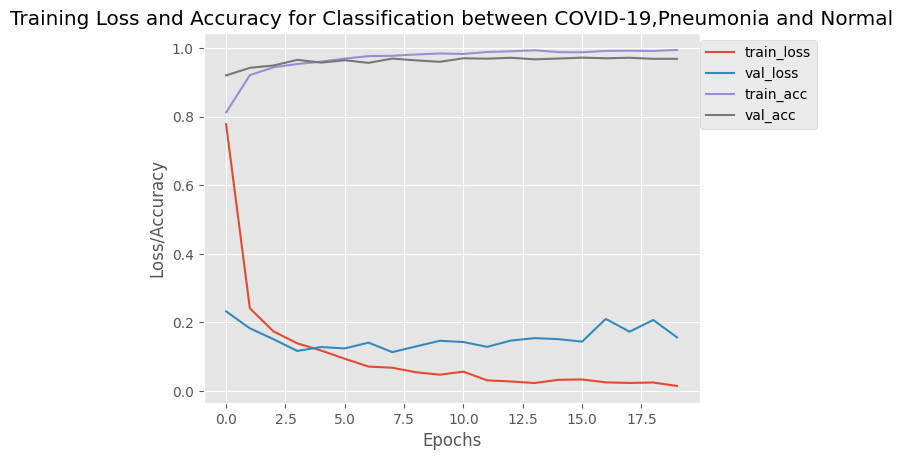

In [25]:
#loss/accuracy graph
n=epochs
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, n), ThisModel.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), ThisModel.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n), ThisModel.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n), ThisModel.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy for Classification between COVID-19,Pneumonia,Lung Cancer,Tuberculosis and Normal")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.savefig("plot.png")

In [26]:
#to check test accuacy
modelLoss, modelAccuracy=model.evaluate(testX, testY, verbose=0)

print('Test Loss is: {}'.format(modelLoss))
print('Test Accuracy is: {}'.format(modelAccuracy ))

Test Loss is: 0.15646231174468994
Test Accuracy is: 0.9687619209289551


In [27]:
modelLoss=[]
modelAccuracy=[]

In [43]:
#classification report on train
predIdxs = model.predict (trainX, batch_size=64)
predIdxs = np.argmax(predIdxs, axis=1)
print("Classification report on train")
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits=3))

164/164 [==============================] - 52s 315ms/step
Classification report on train
              precision    recall  f1-score   support

     COVID19      0.995     0.995     0.995      2129
 LUNG CANCER      1.000     1.000     1.000       554
      NORMAL      0.995     0.999     0.997      3009
   PNEUMONIA      1.000     0.996     0.998      4202
TUBERCULOSIS      0.985     0.985     0.985       602

    accuracy                          0.996     10496
   macro avg      0.995     0.995     0.995     10496
weighted avg      0.996     0.996     0.996     10496



In [44]:
redIdxs=[]

In [45]:
#classification report on test
predIdxs=model.predict(testX, batch_size=64)
predIdxs=np.argmax(predIdxs, axis=1)
print("Classification report on test")
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits=3))
     

42/42 [==============================] - 13s 300ms/step
Classification report on test
              precision    recall  f1-score   support

     COVID19      0.970     0.966     0.968       533
 LUNG CANCER      0.986     0.993     0.989       138
      NORMAL      0.961     0.969     0.965       753
   PNEUMONIA      0.978     0.974     0.976      1051
TUBERCULOSIS      0.926     0.913     0.919       150

    accuracy                          0.969      2625
   macro avg      0.964     0.963     0.964      2625
weighted avg      0.969     0.969     0.969      2625



In [31]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusionmatrix=confusion_matrix(testY.argmax(axis=1), predIdxs)
print(confusionmatrix)

[[ 515    0    4    3   11]
 [   0  137    1    0    0]
 [   2    1  730   20    0]
 [   3    0   24 1024    0]
 [  11    1    1    0  137]]


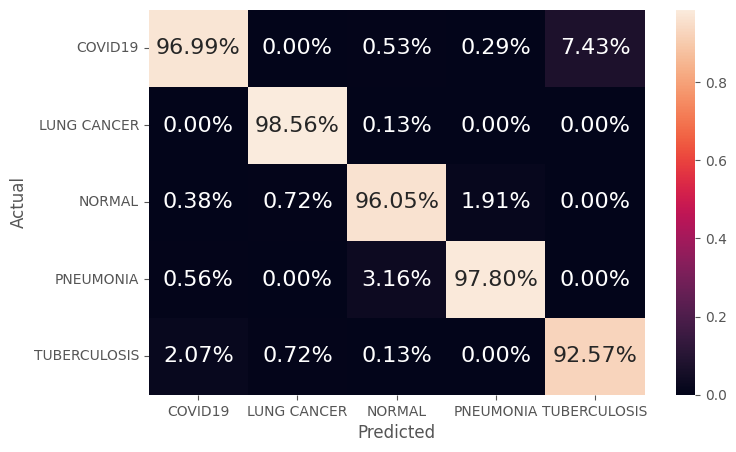

In [32]:
#heatmap
df_cm=pd.DataFrame(confusionmatrix, columns=le.classes_, index=le.classes_)
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(8,5))
sns.heatmap(df_cm/np.sum(df_cm), fmt='.2%', annot=True, annot_kws={'size':16})
plt.show()

In [33]:
#loading the model
from tensorflow import keras
model=keras.models.load_model('C:/Users/Uday/Desktop/python/Major/Final_CNN.h5')

In [34]:
#necessary libraries
from numpy import asarray
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
     

In [35]:
#image paths
covid_img_path="C:/Users/Uday/Desktop/python/Major/New-Data/valid/COVID19/COVID19(227).jpg"
lungcancer_img_path="C:/Users/Uday/Desktop/python/Major/New-Data/valid/LUNG CANCER/000111.jpg"
normal_img_path="C:/Users/Uday/Desktop/python/Major/New-Data/valid/NORMAL/NORMAL(11).jpg"
pneumonia_img_path="C:/Users/Uday/Desktop/python/Major/New-Data/valid/PNEUMONIA/PNEUMONIA(2).jpg"
tuberculosis_img_path="C:/Users/Uday/Desktop/python/Major/New-Data/valid/TUBERCULOSIS/TUBERCULOSIS-32.jpg"

img_paths=[covid_img_path, normal_img_path, pneumonia_img_path,lung_cancer_img_path,tuberculosis_img_path]

In [36]:
print(img_paths)

['C:/Users/Uday/Desktop/python/Major/New-Data/valid/COVID19/COVID19(227).jpg', 'C:/Users/Uday/Desktop/python/Major/New-Data/valid/LUNG CANCER/000111.jpg', 'C:/Users/Uday/Desktop/python/Major/New-Data/valid/NORMAL/NORMAL(11).jpg', 'C:/Users/Uday/Desktop/python/Major/New-Data/valid/PNEUMONIA/PNEUMONIA(2).jpg', 'C:/Users/Uday/Desktop/python/Major/New-Data/valid/TUBERCULOSIS/TUBERCULOSIS-32.jpg']


In [37]:
#preprocessing the image
resize=150

images=[]

for img_path in img_paths:
    img_path=cv2.imread(img_path)
    img_path=cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB) 
    img_path=cv2.resize(img_path, (resize, resize)) /255
    images.append(img_path)

In [38]:
#printing image shape
count=0
for _ in images:
    images[count]=np.array(images[count])
    images[count]=np.expand_dims(images[count], axis=0)
    print(images[count].shape)
    count+=1

(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)


In [39]:
#prediction
prediction=[]
for i in images:
    prediction.append(model.predict(i))

1/1 [==============================] - 0s 27ms/step


In [40]:
#output of prediction
output=[]
for p in prediction:
    output.append(np.argmax(p,axis=1))

In [41]:
#0: COVID-19
#1: lung cancer
#2: Normal
#3: Pneumonia
#4: Tuberculosis

title=[]

for out in output:
    if out==0:
        title.append('COVID-19')
    elif out==1:
        title.append('LUNG CANCER')
    elif out==2:
        title.append('NORMAL')
    elif out==3:
        title.append('PNEUMONIA')
    else:
        title.append('TUBERCULOSIS')
    

print(title)

['COVID-19', 'LUNG CANCER', 'NORMAL', 'PNEUMONIA', 'TUBERCULOSIS']


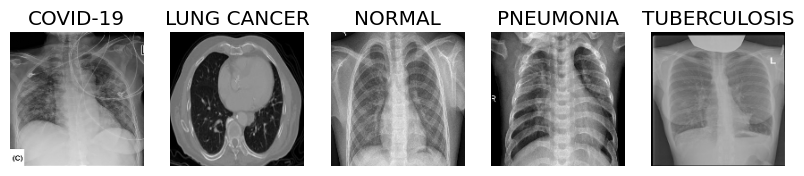

In [42]:
#printing the images with predicted output
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

i=0

for img in images:
    plt.subplot(1,5,i+1)
    plt.imshow(np.squeeze(img) , cmap='gray')
    plt.title(title[i])
    plt.axis('off')  
    i+=1   
plt.show()